In [100]:
username = "nova"
pathtorepo = "/home/nova/work/repo_ds/dynamical-systems"
using Pkg
Pkg.activate(pathtorepo * "/env/integrate/")

using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

include("/home/nova/work/repo_ds/dynamical-systems/system.jl")
include("/home/nova/work/repo_ds/dynamical-systems/visual.jl")

  Activating project at `~/work/repo_ds/dynamical-systems/env/integrate`


plot_3d_2c_fp (generic function with 1 method)

In [101]:
"""username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")"""

"username = \"Alex\"\npathtorepo = \"C:\\Users\\\" *username *  \"\\Desktop\\\"\nusing Pkg\nPkg.activate(pathtorepo * \"dynamical-systems\\env\\integrate\\\")"

In [111]:
time = 3000.0; tt = 0.0; tstep = 0.001; tt = 500.0; times = [time, tt];
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [163]:
u0_chaos = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
u0 = [8.8746, 0.4815, 0.8089, 0.0, 0.0, 0.0];
param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);
println(indexparams);

In [169]:
dict, indexparams = TM6_glial_ECM_help(param);
get(dict, "I0", nothing)

-1.74

In [184]:
param[11] = -1.738

-1.738

In [189]:
ds = CoupledODEs(TM6_glial_ECM, tr[end], param, diffeq = integ_set);
tr, trange = trajectory(ds, time, Ttr = tt, Δt = tstep);

In [190]:
Er = interval(0.0, 30.0);
xr, ur, yr = interval(0.0, 1.0), interval(0.0, 1.0), interval(0.0, 1.0);
ecmr, pr = interval(0.0, 0.1), interval(0.0, 0.1);
box = IntervalBox(Er, xr, ur, yr, ecmr, pr);

fp, eigs, stable = fixedpoints(ds, box, TM6_glial_ECM_jac, tol = 1e-10, method = IntervalRootFinding.Krawczyk);

┌ Warning: Non-unique fixed points found!
└ @ ChaosTools /home/nova/.julia/packages/ChaosTools/Nr2Oq/src/stability/fixedpoints.jl:103


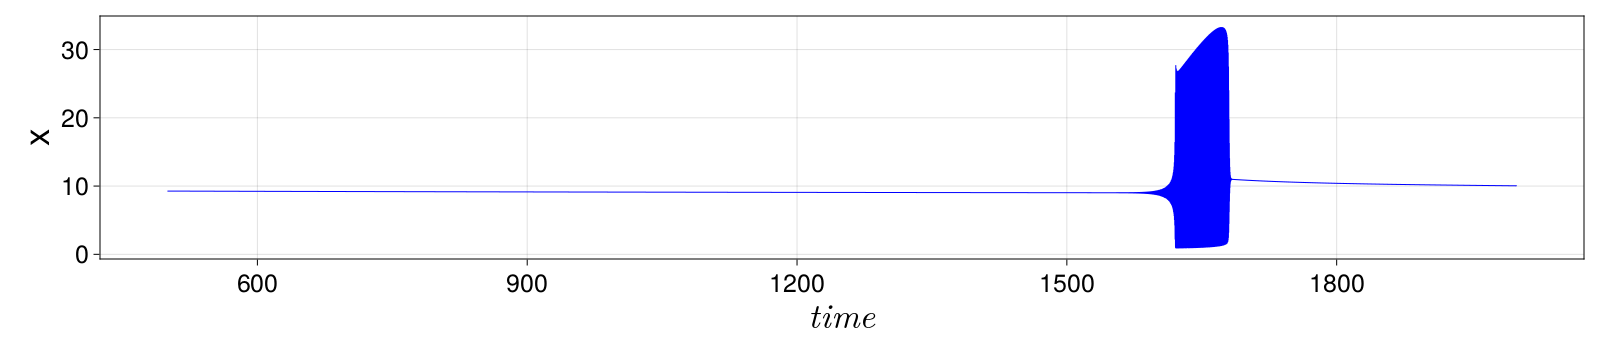

In [191]:
plot_timesereis(trange, tr[:, 1], 1, 1500000, width = 1600, height = 350, inter=false, lw = 1.0, color = :blue);

In [182]:
fp

6-dimensional StateSpaceSet{Float64} with 3 points
 8.88374   0.481219  0.80901   0.000181619  2.47915e-13  1.77956e-23
 0.947031  0.924437  0.575405  0.488659     4.09301e-12  7.61928e-23
 2.97207   0.78074   0.629947  0.0664683    1.00733e-12  1.56682e-23

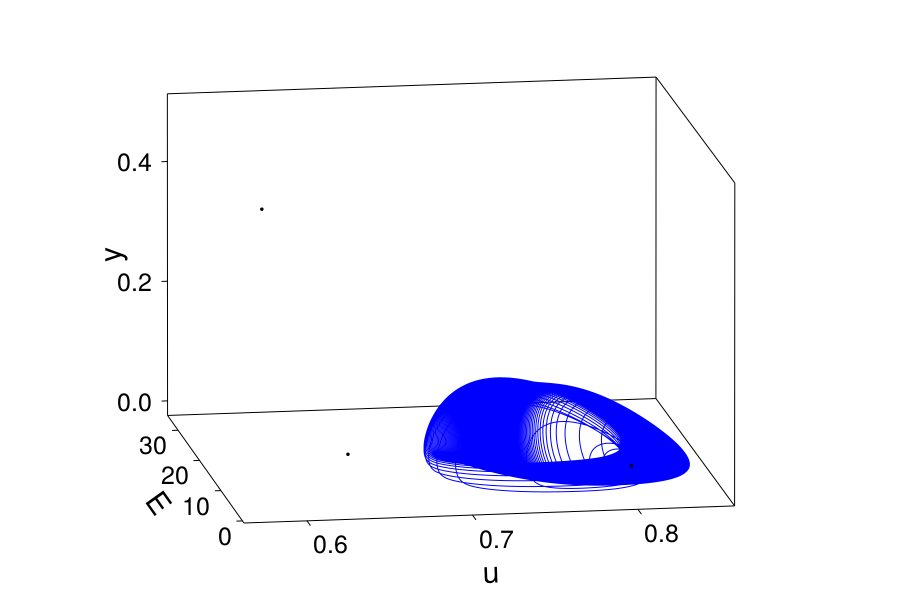

In [192]:
idx, idy, idz = 3, 1, 4
data = [tr[:, idx], tr[:, idy], tr[:, idz]]
plot_3d_fp(data, [fp, idx, idy, idz], 1, 1500000; prot = 60, azim = -0.55pi, elev = 0.07pi,  xl = "u", yl = "E", zl = "y", color = :blue);